In [174]:
from hydroDL import kPath

from matplotlib import pyplot as plt
import pandas as pd
import os
import numpy as np

In [175]:
# load results
# results_path = '~/Desktop/best_metrics_all_runs.csv'
results_path = '~/Downloads/best_metrics_all_runs.csv'

df = pd.read_csv(results_path, header=1)

In [176]:
cols_to_keep = [
    'run_name', 'dataset', 'split_version', 'fold',
    'qual_obs_rmse', 'qual_obs_corrcoef', 'qual_obs_coefdet', 
    'qual_site_rmse', 'qual_site_corrcoef', 'qual_site_coefdet', 
    'qual_anomaly_rmse', 'qual_anomaly_corrcoef', 'qual_anomaly_coefdet', 
    'poor_obs_rmse', 'poor_obs_corrcoef', 'poor_obs_coefdet',
    'poor_site_rmse', 'poor_site_corrcoef', 'poor_site_coefdet', 
    'poor_anomaly_rmse', 'poor_anomaly_corrcoef', 'poor_anomaly_coefdet',  
    'train_obs_rmse', 'train_obs_corrcoef', 'train_obs_coefdet', 
    'train_site_rmse', 'train_site_corrcoef', 'train_site_coefdet', 
    'train_anomaly_rmse', 'train_anomaly_corrcoef', 'train_anomaly_coefdet',
    'mean_epoch_time', 'mean_iteration_time', 'mean_test_time',
]

In [177]:
cols_to_keep = [
    'qual_obs_rmse', 'train_obs_rmse',
    'qual_obs_coefdet', 'train_obs_coefdet'
]

df = df[cols_to_keep]

In [178]:
df2 = pd.read_csv('~/Downloads/wandb.csv')

In [179]:
df.qual_obs_rmse = round(df.qual_obs_rmse, 6)
df2.qual_obs_rmse = round(df2.qual_obs_rmse, 6)
df.qual_obs_coefdet = round(df.qual_obs_coefdet, 6)
df2.qual_obs_coefdet = round(df2.qual_obs_coefdet, 6)

df = df.merge(df2, on=['qual_obs_rmse', 'qual_obs_coefdet'])
df['fold'] = df.Name.str[-1] 

In [182]:
order = ['dataset', 'split_version', 'fold', 'seed', 'train_obs_rmse', 'qual_obs_rmse', 'train_obs_coefdet', 'qual_obs_coefdet']
df.sort_values(['dataset', 'split_version', 'fold', 'seed'])[order].to_csv('~/Desktop/runs_by_folds_seeds.csv', index=False)

In [183]:
df = df.drop(['Name', 'seed'], axis=1)
df = df.groupby(['dataset', 'split_version', 'fold']).mean()
order = ['train_obs_rmse', 'qual_obs_rmse', 'train_obs_coefdet', 'qual_obs_coefdet']
df[order].to_csv('~/Desktop/runs_by_folds.csv')

In [ ]:
# df = df[cols_to_keep].groupby('run_name').agg(np.mean)[['qual_obs_rmse', 'train_obs_rmse']].sort_values('qual_obs_rmse')

### Extra

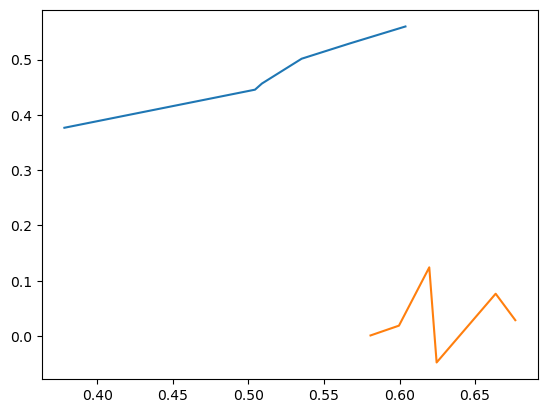

In [52]:
plt.plot(df[df.split_version == 'random'].sort_values('train_obs_coefdet').train_obs_coefdet, df[df.split_version == 'random'].sort_values('train_obs_coefdet').qual_obs_coefdet)
plt.plot(df[df.split_version == 'stratified'].sort_values('train_obs_coefdet').train_obs_coefdet, df[df.split_version == 'stratified'].sort_values('train_obs_coefdet').qual_obs_coefdet)

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot
plt.figure(figsize=(15, 6))
sns.boxplot(x='model', y='qual_obs_coefdet', data=df)
plt.xlabel('Model')
plt.ylabel('Overall R2')
plt.title('Model Overall R2 Stability')
plt.show()

ValueError: Could not interpret value `model` for `x`. An entry with this name does not appear in `data`.

<Figure size 1500x600 with 0 Axes>

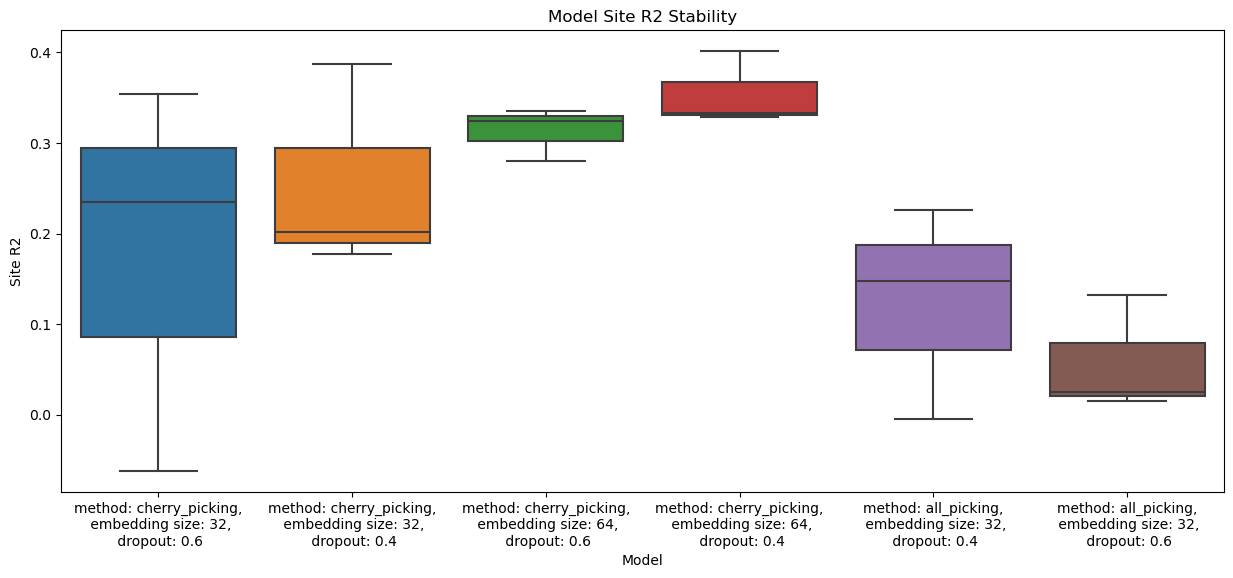

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot
plt.figure(figsize=(15, 6))
sns.boxplot(x='model', y='qual_site_coefdet', data=df)
plt.xlabel('Model')
plt.ylabel('Site R2')
plt.title('Model Site R2 Stability')
plt.show()

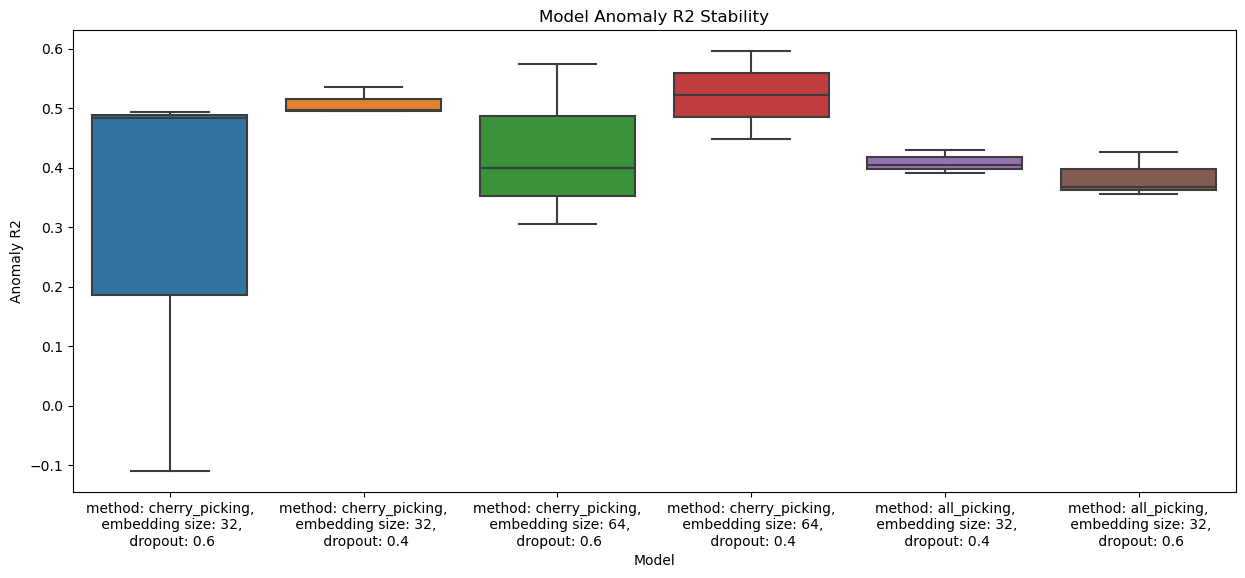

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot
plt.figure(figsize=(15, 6))
sns.boxplot(x='model', y='qual_anomaly_coefdet', data=df)
plt.xlabel('Model')
plt.ylabel('Anomaly R2')
plt.title('Model Anomaly R2 Stability')
plt.show()

In [4]:
df.sort_values('qual_obs_coefdet')[['run_name', 'qual_obs_coefdet', 'qual_obs_rmse', 'qual_site_coefdet', 'qual_site_rmse', 'qual_anomaly_coefdet', 'qual_anomaly_rmse']]

run_name  qual_obs_coefdet  qual_obs_rmse  qual_site_coefdet  \
2    cherry_32_0.6_500         -0.014900      41.371060      -2.653493e+16   
16     all_32_0.4_1000          0.530548      28.137164      -1.601071e-01   
7   cherry_64_0.4_1000          0.545401      27.688484       1.316589e-02   
15     all_32_0.6_1000          0.562059      27.176456      -8.152381e-04   
17     all_32_0.2_1000          0.562952      27.148728       2.043936e-01   
21     all_64_0.2_1000          0.565251      27.077226       1.016393e-01   
5    cherry_64_0.6_500          0.566234      27.046615       5.466239e-02   
10   cherry_64_0.2_500          0.582300      26.540990       1.264215e-01   
19      all_64_0.6_500          0.583011      26.518387       4.430655e-02   
13      all_32_0.6_500          0.589608      26.307797       1.778198e-01   
14      all_32_0.4_500          0.601498      25.923901       5.199366e-02   
12      all_32_0.2_500          0.604987      25.810139       2.371182e-01   
20      all_64_0.2_500          0.621482      25.265504       2.000688e-01   
6   cherry_32_0.6_1000          0.624796      25.154661       1.706195e-01   
18      all_64_0.4_500          0.652432      24.210546       2.890269e-01   
8   cherry_64_0.2_1000          0.659107      23.976958       3.788907e-01   
9   cherry_32_0.2_1000          0.662740      23.848843       3.547182e-01   
3   cherry_32_0.4_1000          0.670584      23.569886       3.763467e-01   
1    cherry_32_0.4_500          0.683887      23.089056       3.391388e-01   
0    cherry_32_0.2_500          0.683954      23.086601       3.043881e-01   
4    cherry_64_0.4_500          0.688417      22.923022       3.064563e-01   
11  cherry_64_0.6_1000          0.692027      22.789855       4.001789e-01   

    qual_site_rmse  qual_anomaly_coefdet  qual_anomaly_rmse  
2        29.648049         -2.726950e+15          32.765426  
16       23.522942          3.575960e-01          21.905609  
7        22.227116         -1.213441e-01          22.646140  
15       23.028757          4.141844e-01          21.587633  
17       22.603097          4.153727e-01          22.061721  
21       22.342292          3.627257e-01          22.312036  
5        23.184680          1.531912e-01          21.536766  
10       21.638602          3.895617e-02          21.859895  
19       21.919118          3.082614e-01          21.111564  
13       22.166595          4.584997e-01          21.213393  
14       22.547855          4.528958e-01          20.491920  
12       21.159379          4.583816e-01          20.966191  
20       21.946073          4.258496e-01          20.356111  
6        22.575681          4.459727e-01          19.276710  
18       21.937041          4.525848e-01          19.703286  
8        20.590281          5.054985e-01          19.445296  
9        20.028894          5.349174e-01          19.106702  
3        19.325608          5.253154e-01          19.218136  
1        20.559057          5.166649e-01          18.447683  
0        21.955852          5.346910e-01          18.516772  
4        21.980935          5.293819e-01          18.322433  
11       20.119360          5.494859e-01          18.487308

In [38]:
df[['training_method', 'mean_epoch_time', 'mean_iteration_time', 'mean_test_time']].groupby('training_method').mean()

mean_epoch_time  mean_iteration_time  mean_test_time
training_method                                                      
all_picking            37.395685             1.767833       20.126205
cherry_picking          2.030158             0.095612       11.885740

In [9]:
new_df = new_df[(new_df.iloc[:, 17:] >= 0).all(axis=1)]

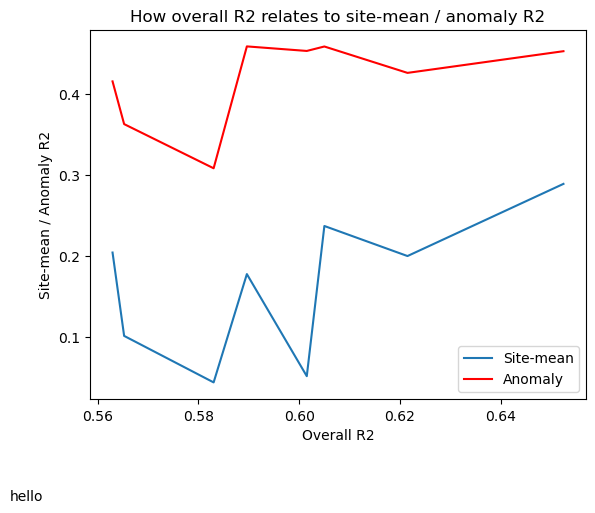

In [54]:
# VERSUS SITE
new_df = new_df.sort_values('qual_obs_coefdet')
plt.plot(new_df.qual_obs_coefdet, new_df.qual_site_coefdet)
# plt.scatter(new_df.qual_obs_coefdet, new_df.qual_site_coefdet)

plt.plot(new_df.qual_obs_coefdet, new_df.qual_anomaly_coefdet, c='red')
# plt.scatter(new_df.qual_obs_coefdet, new_df.qual_anomaly_coefdet, c='red')

plt.xlabel('Overall R2')
plt.ylabel('Site-mean / Anomaly R2')

plt.legend(['Site-mean', 'Anomaly'])
plt.title('How overall R2 relates to site-mean / anomaly R2')
plt.figtext(0, -0.1, 'Note: Here, all observations are from quality sites (>30 obs/site). Also, metrics are taken from epochs with ')

plt.show()

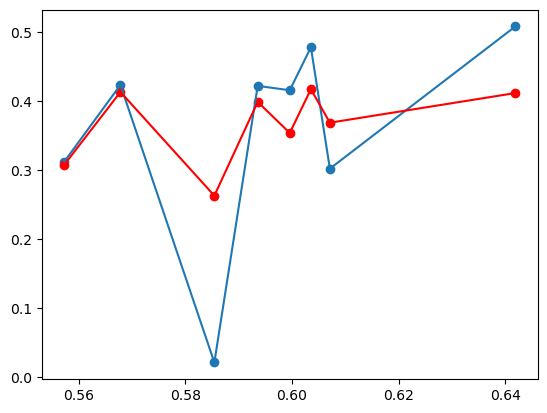

In [37]:
new_df = new_df.sort_values('poor_obs_coefdet')
plt.plot(new_df.poor_obs_coefdet, new_df.poor_site_coefdet)
plt.scatter(new_df.poor_obs_coefdet, new_df.poor_site_coefdet)

plt.plot(new_df.poor_obs_coefdet, new_df.poor_anomaly_coefdet, c='red')
plt.scatter(new_df.poor_obs_coefdet, new_df.poor_anomaly_coefdet, c='red')

plt.show()

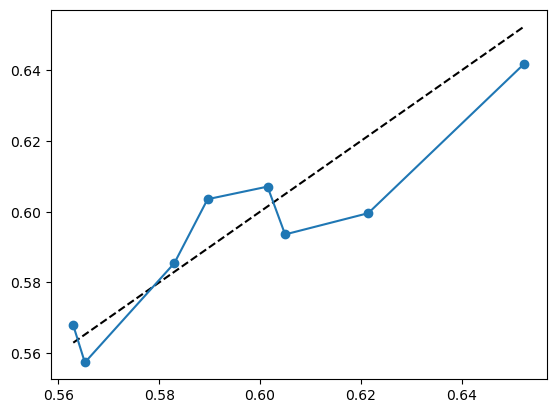

In [28]:
x = np.linspace(min(new_df.qual_obs_coefdet), max(new_df.qual_obs_coefdet))
plt.plot(x, x, label='x = y', linestyle='--', color='black')
plt.plot(new_df.qual_obs_coefdet, new_df.poor_obs_coefdet)
plt.scatter(new_df.qual_obs_coefdet, new_df.poor_obs_coefdet)
plt.show()

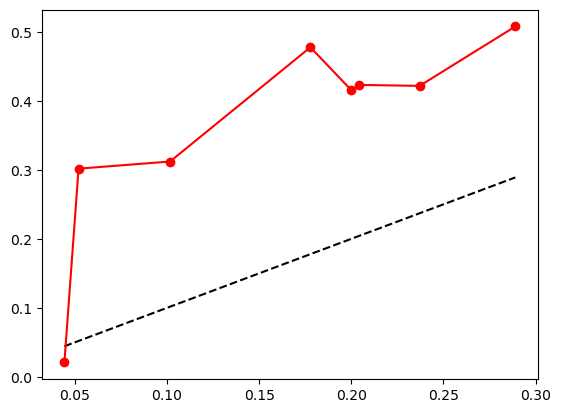

In [34]:
new_df = new_df.sort_values('qual_site_coefdet')
x = np.linspace(min(new_df.qual_site_coefdet), max(new_df.qual_site_coefdet))
plt.plot(x, x, label='x = y', linestyle='--', color='black')
plt.plot(new_df.qual_site_coefdet, new_df.poor_site_coefdet, color='red')
plt.scatter(new_df.qual_site_coefdet, new_df.poor_site_coefdet, color='red')

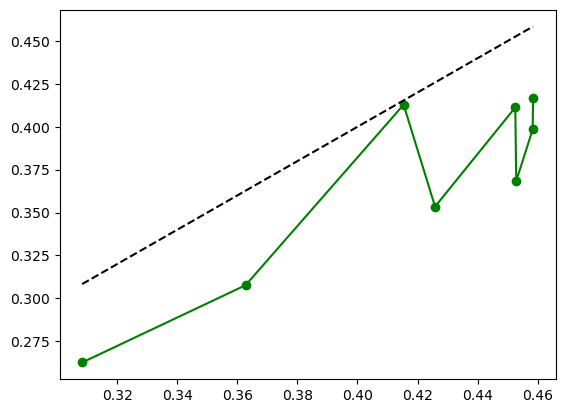

In [36]:
new_df = new_df.sort_values('qual_anomaly_coefdet')
x = np.linspace(min(new_df.qual_anomaly_coefdet), max(new_df.qual_anomaly_coefdet))
plt.plot(x, x, label='x = y', linestyle='--', color='black')
plt.plot(new_df.qual_anomaly_coefdet, new_df.poor_anomaly_coefdet, color='green')
plt.scatter(new_df.qual_anomaly_coefdet, new_df.poor_anomaly_coefdet, color='green')